# <center><span style="color:#64AE2E">Instituto Nacional de Pesquisas Espaciais<br>Programa de Pós Graduação em Sensoriamento Remoto<br>SER-347 - Introdução à Programação para Sensoriamento Remoto</span><center><br><hr style="border:2px solid #DEC827;">

# <center><span style="color:#F13214">Acurácia do produto "Risco de fogo" no Brasil para diferentes Estados, Biomas, Regiões e Sazonalidade</span>
<hr style="border:2px solid #DE6127;">

<img src="https://uploaddeimagens.com.br/images/002/693/706/original/risco_de_fogo_2019.png?1591449365" alt="Queimadas" style="height: 150px;" align="right">
    
# <span style="color:#DE6127">Processamento dos dados</span>

<span style="color:#9C3526">Professores:</span>

<span style="color:#9C3526">- Gilberto Ribeiro de Queiroz</span>

<span style="color:#9C3526">- Thales Sehn Körting</span>

<span style="color:#9C3526">Alunos: </span>

<span style="color:#9C3526">- Bruno Vargas Adorno </span>

<span style="color:#9C3526">- Gabriel Máximo da Silva </span>



# <span style="color:#461F17">Contextualização</span>

O Instituto Nacional de Pesquisas Espaciais possui um sistema de monitoramento de queimadas integrado com diversos produtos de monitoramento por satélite que auxiliam a detecção de focos de incêndios e queimadas em todo território nacional. Os incêndios florestais de forma natural ocorrem quando há fatores favoráveis para o início da combustão de forma natural, como a baixa umidade, altas temperaturas, e materiais inflamáveis, entretanto, de forma antrópica ocorre de forma criminosa iniciado pelo homem. Visto isso, este sistema de monitoramento possui uma base livre de dados disponível para a população com séries históricas que auxiliam a utilização de dados com diversos parâmetros para analisar o risco de fogo para todo o território nacional. Portanto, este `Jupyter Notebook` tem como objetivo analisar a acurácia do produto [`Risco de Fogo`](http://queimadas.dgi.inpe.br/queimadas/portal/risco-de-fogo-meteorologia) com base nos focos de calor por **Bioma, Região, Unidades Federativas e Estações do ano**.


<img src="https://uploaddeimagens.com.br/images/002/695/395/original/Capturar.JPG?1591559336" alt="Precipitacao" style="height: 250px;" align="right">
<img src="https://uploaddeimagens.com.br/images/002/695/405/original/Capturar1.JPG?1591559516" alt="vegetacao" style="height: 220px;" align="left">
<img src="https://uploaddeimagens.com.br/images/002/695/406/original/Capturar2.JPG?1591559621" alt="vegetacao" style="height: 260px;" align="center">

fonte: [_Setzer et al._ (2019)](http://queimadas.cptec.inpe.br/~rqueimadas/documentos/RiscoFogo_Sucinto.pdf)


>- A esquerda temos a probabilidade de risco de fogo por tipo de vegetação e dias decorridos sem chuva, nota-se conforme mais densa e de porte arbório a vegetação, maior a necessidade de período de secas para apresentar um risco de fogo mais alto.
- A direita é um exemplo para meados de setembro do produto de precipitação utilizado como parâmetro para o cálculo de risco de fogo
- Ao centro o resultado observado para América latina, observando a alta correlação do risco com a falta de chuva e em biomas com vegetação mais densa (Amazônia).

# <span style="color:#461F17">1.0 Importação das bibliotecas</span>

Importação das bibliotecas para o processamento de `geodataframes`, `dataframe`, `matplotlib`(com as funções de plotagem de gráficos em Python `pylot`) e `numpy`. Adicionalmente, foi importado o módulo `riscofogo.py`, criado para o pré-processamento dos dados:
> O módulo é um arquivo python que pode armazenar funções úteis para o processamento de dados em outro arquivo similar ao que é feito com as demais bibliotecas

In [1]:
#importação das bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importação do módulo
import riscofogo as rf

# <span style="color:#461F17">2.0 Leitura dos dados de focos de queimadas</span>

Leitura dos arquivos `shapefile` para cada ano de análise:
> Os arquivos estão armazenados no diretório `Dados_focos` separados por ano, conforme apresentado no endereço do arquivo como argumento da função `read_file` da biblioteca `geopandas`

In [2]:
focos_2015 = gpd.read_file('Dados_focos/2015/Focos_2015-01-01_2015-12-31.shp')
focos_2016 = gpd.read_file('Dados_focos/2016/Focos_2016-01-01_2016-12-31.shp')
focos_2017 = gpd.read_file('Dados_focos/2017/Focos_2017-01-01_2017-12-31.shp')
focos_2018 = gpd.read_file('Dados_focos/2018/Focos_2018-01-01_2018-12-31.shp')
focos_2019 = gpd.read_file('Dados_focos/2019/Focos_2019-01-01_2019-12-31.shp')


# <span style="color:#461F17">3.0 Pré-processamento</span>

<div class="alert alert-block alert-info">
<b>⛔ Informação:</b> As etapas de pré-processamento estão detalhadas no arquivo Projeto8_preprocessamento.ipynb</div>

#  <span style="color:#461F17">3.1 Consolidação de um `geodataframe` para cada ano</span>

Os dados brutos de focos de calor contém algumas colunas não necessárias para a finalidade deste trabalho além de células com dados `NaN`.
Esta etapa visa corrigir ou eliminar dados `NaN` e criar colunas de estações, regiões e classes de risco de fogo de acordo com apresentado por [_Setzer et al._ (2019)](http://queimadas.cptec.inpe.br/~rqueimadas/documentos/RiscoFogo_Sucinto.pdf). Assim, o `geodataframe` final terá as colunas **`Precipitação`, `Risco de Fogo`, `Classe de Risco de fogo`, `Estações`, `UF`, `Regiões`** e **`Biomas`**.

> Utilizando a função `preproc` do módulo `riscofogo.py` ou `rf`.

In [3]:
focos_2015.isnull().sum()

datahora           0
satelite           0
pais               0
estado             0
municipio          0
bioma              0
diasemchuv    216782
precipitac         0
riscofogo       9430
latitude           0
longitude          0
frp           216782
geometry           0
dtype: int64

In [4]:
focos_2015_final = rf.preproc(focos_2015)
focos_2016_final = rf.preproc(focos_2016)
focos_2017_final = rf.preproc(focos_2017)
focos_2018_final = rf.preproc(focos_2018)
focos_2019_final = rf.preproc(focos_2019)

focos_2015_final.isnull().sum()

datahora        0
satelite        0
pais            0
estado          0
municipio       0
bioma           0
precipitac      0
riscofogo       0
latitude        0
longitude       0
geometry        0
risco_classe    0
dia do ano      0
estacoes        0
legenda         0
index_right     0
NM_REGIAO       0
dtype: int64

Uma análise visual dos `Geodataframes` consolidados pode ser feita a partir da _plotagem_ dos pontos de focos de calor no território brasileiro delimitado pelas unidades federativas para cada estação do ano

In [5]:
# lendo arquivo shape de unidades federativas para plotar em mapas junto com os focos de calor
UF = gpd.read_file('uf-2018/BRUFE250GC_SIR.shp', encoding='utf-8').to_crs('EPSG:4326')

Uma demonstração da plotagem para um dos anos está apresentada abaixo:

- Foram definidos subplots a partir de uma figura com 1 linha e 4 colunas, sendo que em cada subplot os focos das estações VERÃO, OUTONO, INVERNO e PRIMAVERA, respectivamente, foram plotados sobre o mapa de unidades federativas do Brasil.
- Definimos a paleta de cores do argumento colormap `RdYlGn` representando os riscos críticos a mínimo num gradiente do vermelho escuro, passando pelo amarelo ao verde escuro.
- A coluna do Geodataframe `legenda`, enumerada de 1 a 5 para os riscos crítico a mínimo foi utilizada como base para a classificação das cores
- A função `replace_legend_items` associada a um dicionário foi implementada para substituir os números pelas classes `Crítico`, `Alto`, `Médio`,`Baixo`, `Mínimo`.

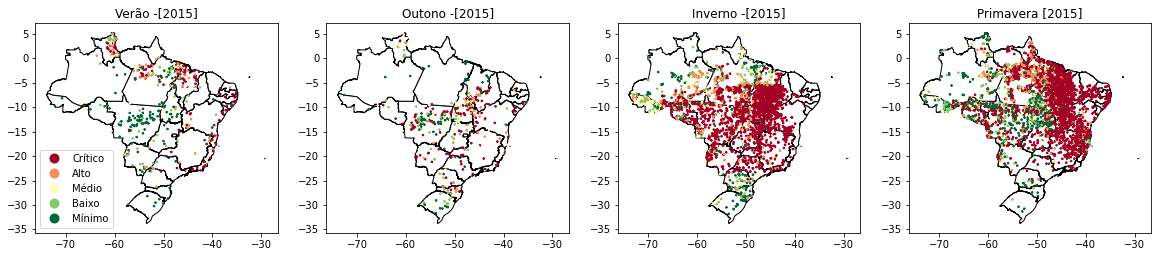

In [6]:

f,ax = plt.subplots(1,4,figsize=(20,20))

UF.plot(ax=ax[0], color='white', edgecolor='k');
focos_2015_final[focos_2015_final.estacoes=='VERÃO'].plot(ax=ax[0], marker='x', column = 'legenda', cmap='RdYlGn', markersize=3,legend = True)
ax[0].set_title('Verão -'+ str(np.unique(focos_2015_final.datahora.dt.year)))

UF.plot(ax=ax[1], color='white', edgecolor='k');
focos_2015_final[focos_2015_final.estacoes=='OUTONO'].plot(ax=ax[1], marker='x', column = 'legenda', cmap='RdYlGn', markersize=3,legend = False)
ax[1].set_title('Outono -'+ str(np.unique(focos_2015_final.datahora.dt.year)))

UF.plot(ax=ax[2], color='white', edgecolor='k');
focos_2015_final[focos_2015_final.estacoes=='INVERNO'].plot(ax=ax[2], marker='x', column = 'legenda', cmap='RdYlGn', markersize=3,legend = False)
ax[2].set_title('Inverno -'+ str(np.unique(focos_2015_final.datahora.dt.year)))

UF.plot(ax=ax[3], color='white', edgecolor='k');
focos_2015_final[focos_2015_final.estacoes=='PRIMAVERA'].plot(ax=ax[3], marker='x', column = 'legenda', cmap='RdYlGn', markersize=3,legend = False)
ax[3].set_title('Primavera '+ str(np.unique(focos_2015_final.datahora.dt.year)))

new_legend = {'1':'Crítico', '2':'Alto', '3':'Médio', '4':'Baixo', '5':'Mínimo'}

def replace_legend_items(legend, mapping):
        for txt in legend.texts:
            for k,v in mapping.items():
                if txt.get_text() == str(k):
                    txt.set_text(v)

replace_legend_items(ax[0].get_legend(), new_legend)

plt.show()

> Na sequência, essa lógica foi inserida dentro de uma função `mapasporano` no módulo `riscofogo.py` e aplicada abaixo para reproduzir os mapas para todos os anos.

<div class="alert alert-block alert-warning">
<b>⚠️ WARNING:</b> No ano de 2016, foi observada ausência de dados para primavera. Portanto, para futuras análises sobre as estações do ano, utilizou-se apenas os shape de 2015, 2017, 2018 e 2019.
</div>

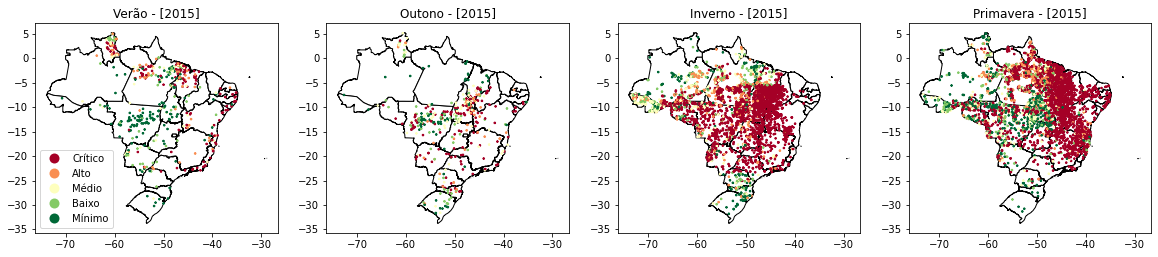

C:\Users\hp\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


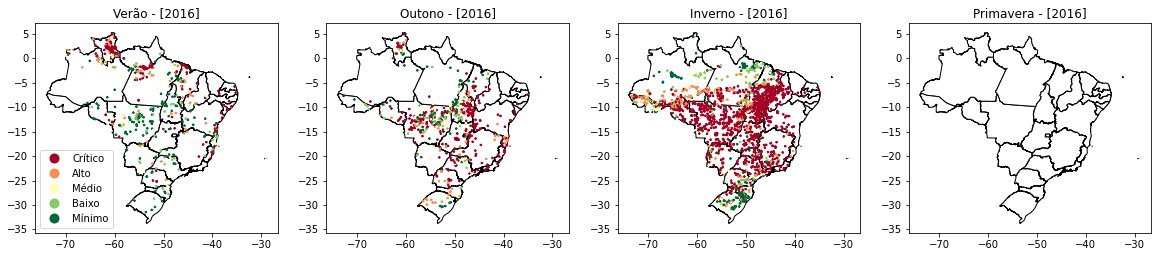

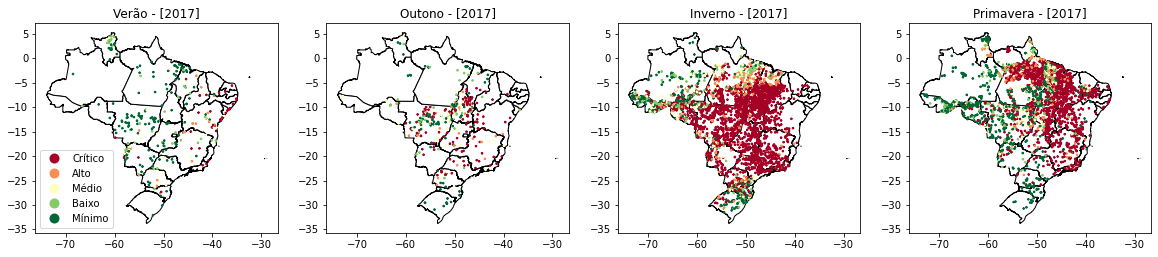

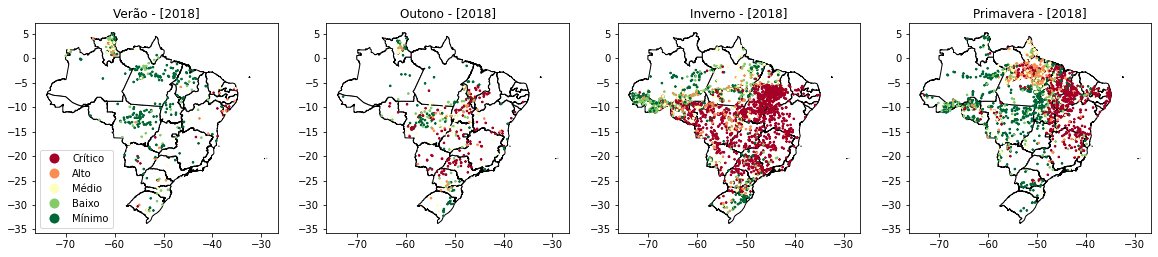

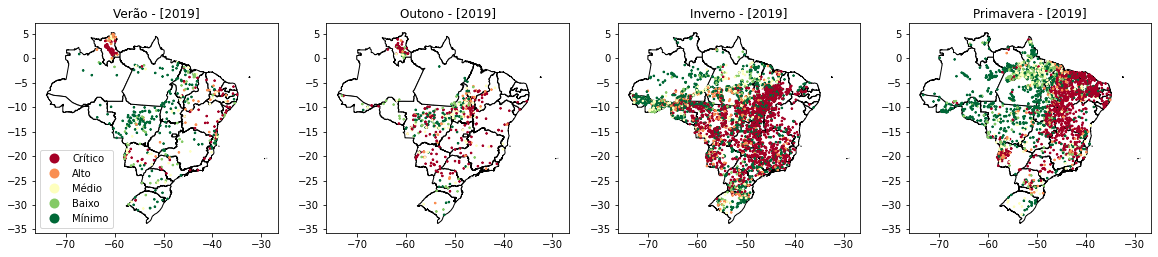

In [7]:
rf.mapasporano(focos_2015_final)

rf.mapasporano(focos_2016_final)

rf.mapasporano(focos_2017_final)

rf.mapasporano(focos_2018_final)

rf.mapasporano(focos_2019_final)

Para testar se há resposta das classes de risco de fogo à precipitação, ou seja, se as médias de precipitação observadas em cada classe são diferentes entre sí, foi realizado a análise de variância (ANOVA).

Funções da biblioteca `statsmodels` podem dar suporte a essa análise.

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Focos_brasil_2015_2019 = pd.concat([focos_2015_final,focos_2016_final,focos_2017_final,
                                    focos_2018_final,focos_2019_final], ignore_index=True)



model = ols('precipitac ~ C(risco_classe)', data=Focos_brasil_2015_2019).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(risco_classe),8.213294e+04,4.0,523.00516,0.0
Residual,1.571346e+06,40024.0,NaN,NaN


Dado o resultado altamente significativo, foi realizado um teste de comparação de médias para verificar quais classes apresentavam diferença entre sí.

In [9]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(Focos_brasil_2015_2019['precipitac'], Focos_brasil_2015_2019['risco_classe'])
post_hoc_res = comp.tukeyhsd(0.1)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
ALTO,BAIXO,0.751,0.001,0.3977,1.1044,True
ALTO,CRITICO,-0.102,0.8588,-0.3626,0.1585,False
ALTO,MEDIO,0.2113,0.5502,-0.1336,0.5563,False
ALTO,MINIMO,3.676,0.001,3.3781,3.9739,True
BAIXO,CRITICO,-0.8531,0.001,-1.1349,-0.5712,True
BAIXO,MEDIO,-0.5397,0.0022,-0.901,-0.1784,True
BAIXO,MINIMO,2.925,0.001,2.6083,3.2417,True
CRITICO,MEDIO,0.3134,0.0364,0.0421,0.5846,True
CRITICO,MINIMO,3.778,0.001,3.5699,3.9861,True
MEDIO,MINIMO,3.4646,0.001,3.1574,3.7719,True


# <span style="color:#461F17">3.2 Tabela Dinâmica</span>

A partir das funções `pvtregiao`, `pvtestacoes`, `pvtestado` e `pvtbioma` do módulo `riscofogo.py`, foram criadas tabelas diâmicas para **todos os anos**, com as colunas de `regiao`, `estacoes`, `estado` e `bioma`:

In [10]:
pvt_regiao_2015 = rf.pvtregiao(focos_2015_final)
pvt_estacao_2015 = rf.pvtestacoes(focos_2015_final)
pvt_estado_2015 = rf.pvtestado(focos_2015_final)
pvt_bioma_2015 = rf.pvtbioma(focos_2015_final)

pvt_regiao_2016 = rf.pvtregiao(focos_2016_final)
pvt_estacao_2016 = rf.pvtestacoes(focos_2016_final)
pvt_estado_2016 = rf.pvtestado(focos_2016_final)
pvt_bioma_2016 = rf.pvtbioma(focos_2016_final)

pvt_regiao_2017 = rf.pvtregiao(focos_2017_final)
pvt_estacao_2017 = rf.pvtestacoes(focos_2017_final)
pvt_estado_2017 = rf.pvtestado(focos_2017_final)
pvt_bioma_2017 = rf.pvtbioma(focos_2017_final)

pvt_regiao_2018 = rf.pvtregiao(focos_2018_final)
pvt_estacao_2018 = rf.pvtestacoes(focos_2018_final)
pvt_estado_2018 = rf.pvtestado(focos_2018_final)
pvt_bioma_2018 = rf.pvtbioma(focos_2018_final)

pvt_regiao_2019 = rf.pvtregiao(focos_2019_final)
pvt_estacao_2019 = rf.pvtestacoes(focos_2019_final)
pvt_estado_2019 = rf.pvtestado(focos_2019_final)
pvt_bioma_2019 = rf.pvtbioma(focos_2019_final)



A tabela faz um somatório do **número de focos** para cada **classe de risco de fogo** por `região`, `estação`, `estado` e `bioma`, em cada `ano` estudado

> Exemplo da visualização da de uma das `tabelas dinâmicas`:

In [11]:
pvt_regiao_2015

count                           
             riscofogo                           
risco_classe      ALTO BAIXO CRITICO MEDIO MINIMO
NM_REGIAO                                        
CENTRO-OESTE       142   153    1063   188    364
NORDESTE           110    49    2647    66     32
NORTE              814   490    2128   674    600
SUDESTE             34    17     543    26     13
SUL                 21    44      32    28     90

A partir destas informações, criou-se uma lista com o número de focos por estação de cada ano para gerar a média de focos por estação para os anos avaliados.

In [12]:
average_estacao_lista = [pvt_estacao_2015,pvt_estacao_2017,pvt_estacao_2018,pvt_estacao_2019]

average_estacao_lista

[                 count                           
              riscofogo                           
 risco_classe      ALTO BAIXO CRITICO MEDIO MINIMO
 estacoes                                         
 INVERNO            490   255    3106   436    271
 OUTONO              50    64     152    81     84
 PRIMAVERA          508   363    3022   411    602
 VERÃO               73    71     133    54    142,
                  count                           
              riscofogo                           
 risco_classe      ALTO BAIXO CRITICO MEDIO MINIMO
 estacoes                                         
 INVERNO            552   452    3864   422    535
 OUTONO              34    46     133    59     98
 PRIMAVERA          328   263    1925   254    669
 VERÃO               18    40      37    27    154,
                  count                           
              riscofogo                           
 risco_classe      ALTO BAIXO CRITICO MEDIO MINIMO
 estacoes                    

Para criar uma tabela com as **médias** de focos de queimadas por `estação do ano` para cada `classe de risco de fogo`, durante o período utilizado utiliza-se a seguinte lógica:

> - _Realizou-se um laço do tipo `for` para gerar um somatório dos focos de calor agrupados por risco de fogo nas estações de cada ano, organizados na lista `average_estacao_lista`, em seguida dividiu-se a matriz resultante pelo número de ítens da lista para a obtenção das médias do número de focos_
- _As colunas foram reordenadas em ordem decrescente de risco de fogo._

In [13]:
tamanho_xlista = len(average_estacao_lista)
soma = 0
for i in range(tamanho_xlista):
    soma += average_estacao_lista[i]

average = soma/tamanho_xlista

average

count                                 
             riscofogo                                 
risco_classe      ALTO   BAIXO  CRITICO   MEDIO  MINIMO
estacoes                                               
INVERNO         506.50  365.50  2758.75  429.75  786.00
OUTONO           45.25   59.75   175.50   76.25   94.75
PRIMAVERA       331.25  306.50  1724.50  315.50  677.25
VERÃO            48.75   65.25    85.50   45.50  178.25

In [14]:
list(average.columns)

[('count', 'riscofogo', 'ALTO'),
 ('count', 'riscofogo', 'BAIXO'),
 ('count', 'riscofogo', 'CRITICO'),
 ('count', 'riscofogo', 'MEDIO'),
 ('count', 'riscofogo', 'MINIMO')]

In [15]:
average = average[[
    ('count', 'riscofogo', 'CRITICO'),
    ('count', 'riscofogo', 'ALTO'),
    ('count', 'riscofogo', 'MEDIO'),
    ('count', 'riscofogo', 'BAIXO'),
    ('count', 'riscofogo', 'MINIMO')]]

average

count                                
             riscofogo                                
risco_classe   CRITICO    ALTO   MEDIO   BAIXO  MINIMO
estacoes                                              
INVERNO        2758.75  506.50  429.75  365.50  786.00
OUTONO          175.50   45.25   76.25   59.75   94.75
PRIMAVERA      1724.50  331.25  315.50  306.50  677.25
VERÃO            85.50   48.75   45.50   65.25  178.25

>No módulo `riscodefogo.py` foi criada a função `mediadosanos` para gerar as médias para os anos a serem estudados, conforme o laço anterior. Esta função visa extrair a média de _n_ anos caso seja o objetivo aumentar o período em estudo, com a finalidade de agilizar o processamento.

# <span style="color:#461F17">4.0 Resultados</span>

A partir da média por estação do ano para cada classe de risco de fogo gerou-se o gráfico utilizando a função `plot` da bilbioteca `matplotlib`, como mostrado no trecho do código abaixo:

In [16]:
average_estacao = rf.mediadosanos([pvt_estacao_2015,pvt_estacao_2017,
                  pvt_estacao_2018,pvt_estacao_2019])
average_estacao

count                                
             riscofogo                                
risco_classe   CRITICO    ALTO   MEDIO   BAIXO  MINIMO
estacoes                                              
INVERNO        2758.75  506.50  429.75  365.50  786.00
OUTONO          175.50   45.25   76.25   59.75   94.75
PRIMAVERA      1724.50  331.25  315.50  306.50  677.25
VERÃO            85.50   48.75   45.50   65.25  178.25

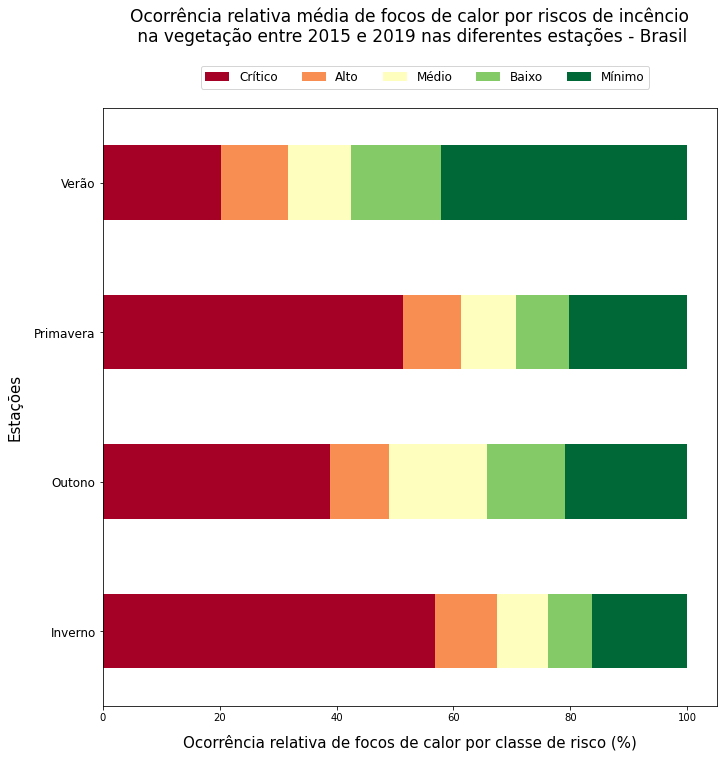

In [17]:
from matplotlib.pyplot import *
fig, ax = subplots()
stack_estacao = average_estacao.div(average_estacao.sum(1), axis=0)
stack_estacao.plot(kind='barh', stacked=True, colormap='RdYlGn', ax=ax, 
           figsize=(11, 11));
ax.legend(['Crítico','Alto','Médio','Baixo','Mínimo'],loc='best', 
          bbox_to_anchor=(0.5, 0.58, 0.4, 0.5), ncol=5, fontsize=12);
plt.yticks(np.arange(4),['Inverno', 'Outono', 'Primavera', 'Verão'],fontsize=12)
plt.xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1],[ "0", "20", "40", "60", "80", "100" ] )
ax.set_xlabel('Ocorrência relativa de focos de calor por classe de risco (%)',fontsize=15,labelpad=12)
ax.set_ylabel("Estações",fontsize=15,labelpad=12)
plt.title("Ocorrência relativa média de focos de calor por riscos de incêncio\n na vegetação entre 2015 e 2019 nas diferentes estações - Brasil", fontsize=17, y=1.1);

No trecho do código acima, temos a plotagem da tabela dinâmica, relacionando os eixos `ocorrência de focos por classe de risco em %` por `estação do ano` nas `classes de risco de fogo` em média para os anos de 2015, 2017, 2018 e 2019.
A função `plot` constrói o gráfico. O primeiro argumento `barh`, corresponde ao tipo de gráfico e `stacked=True` empilha os resultados nas mesmas barras.

> A linha `stack_estacao = average_estacao.div(average_estacao.sum(1), axis=0)` converte o `dataframe` `avarege_estacao` em um `dataframe` de frequência conforme mostrado abaixo:

In [18]:
stack_estacao

count                                        
             riscofogo                                        
risco_classe   CRITICO      ALTO     MEDIO     BAIXO    MINIMO
estacoes                                                      
INVERNO       0.569225  0.104508  0.088672  0.075415  0.162179
OUTONO        0.388704  0.100221  0.168882  0.132337  0.209856
PRIMAVERA     0.514009  0.098733  0.094039  0.091356  0.201863
VERÃO         0.202008  0.115180  0.107501  0.154164  0.421146

In [19]:
average_regiao = rf.mediadosanos((pvt_regiao_2015,pvt_regiao_2016,pvt_regiao_2017,pvt_regiao_2018,
                                 pvt_regiao_2019))

average_regiao

count                            
             riscofogo                            
risco_classe   CRITICO   ALTO  MEDIO  BAIXO MINIMO
NM_REGIAO                                         
CENTRO-OESTE     940.0  146.0  138.2  115.2  361.6
NORDESTE        1453.8   89.6   68.8   48.4  117.6
NORTE           1359.6  531.8  491.8  463.4  819.6
SUDESTE          402.0   34.6   26.0   20.8   49.6
SUL               73.4   36.4   37.0   48.4  132.2

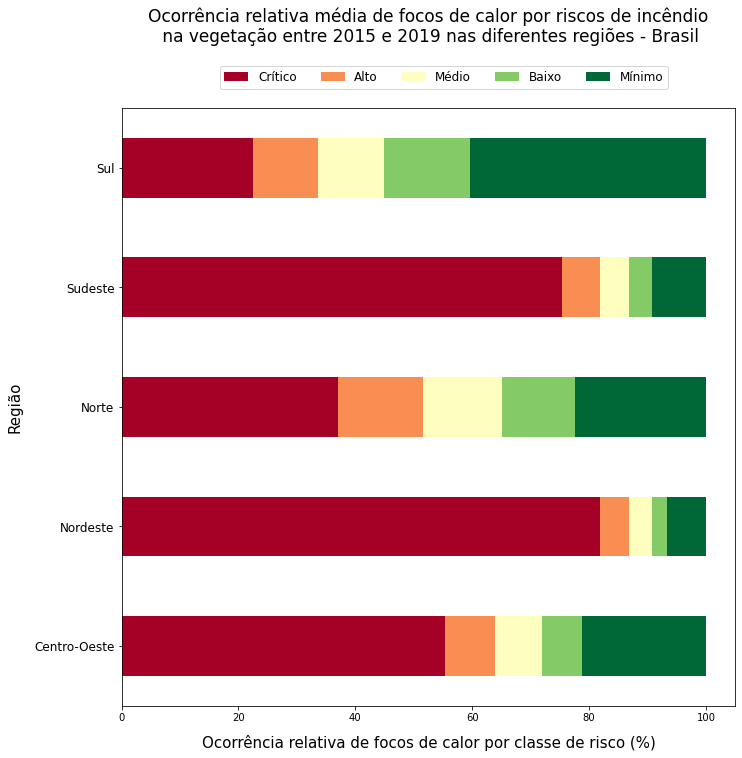

In [20]:
from matplotlib.pyplot import *
fig, ax = subplots()
stack_regiao = average_regiao.div(average_regiao.sum(1), axis=0)
stack_regiao.plot(kind='barh', stacked=True, colormap='RdYlGn', ax=ax, 
           figsize=(11, 11));
ax.legend(['Crítico','Alto','Médio','Baixo','Mínimo'],loc='best', 
          bbox_to_anchor=(0.5, .58, 0.4, 0.5), ncol=5, fontsize=12);
plt.yticks(np.arange(5),['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],fontsize=12)
plt.xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1],[ "0", "20", "40", "60", "80", "100" ] )
ax.set_xlabel('Ocorrência relativa de focos de calor por classe de risco (%)',fontsize=15,labelpad=12)
ax.set_ylabel("Região",fontsize=15,labelpad=12)
plt.title("Ocorrência relativa média de focos de calor por riscos de incêndio\n na vegetação entre 2015 e 2019 nas diferentes regiões - Brasil", fontsize=17, y=1.1);

In [21]:
average_bioma = rf.mediadosanos((pvt_bioma_2015,pvt_bioma_2016,pvt_bioma_2017,pvt_bioma_2018,pvt_bioma_2019))

average_bioma

count                            
               riscofogo                            
risco_classe     CRITICO   ALTO  MEDIO  BAIXO MINIMO
bioma                                               
Amazonia          1411.0  571.2  543.2  504.8  952.0
Caatinga           361.6   12.0    9.6    6.0   26.6
Cerrado           1971.4  162.0  123.0   98.0  285.0
Mata Atlantica     367.0   59.6   57.0   61.0  149.6
Pampa                3.8    6.8    7.0    6.8   26.6
Pantanal           114.0   26.8   22.0   19.6   40.8

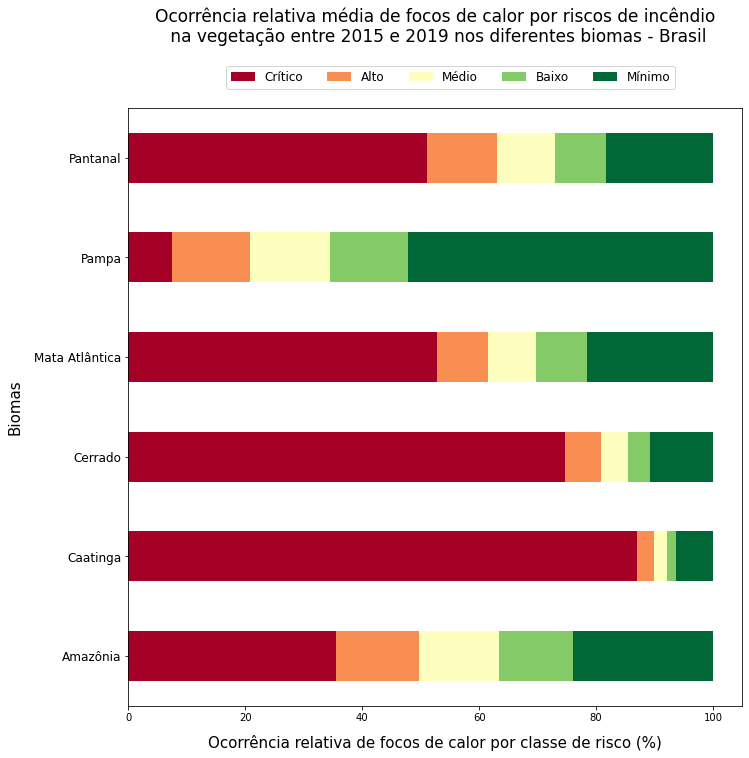

In [22]:
from matplotlib.pyplot import *
fig, ax = subplots()
stack_bioma = average_bioma.div(average_bioma.sum(1), axis=0)
stack_bioma.plot(kind='barh', stacked=True, colormap='RdYlGn', ax=ax, 
           figsize=(11, 11));
ax.legend(['Crítico','Alto','Médio','Baixo','Mínimo'],loc='best', 
          bbox_to_anchor=(0.5, .58, 0.4, 0.5), ncol=5, fontsize=12);
plt.yticks(np.arange(6),['Amazônia', 'Caatinga', 'Cerrado', 'Mata Atlântica', 'Pampa', 'Pantanal'],fontsize=12)
plt.xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1],[ "0", "20", "40", "60", "80", "100" ] )
ax.set_xlabel('Ocorrência relativa de focos de calor por classe de risco (%)',fontsize=15,labelpad=12)
ax.set_ylabel("Biomas",fontsize=15,labelpad=12)
plt.title("Ocorrência relativa média de focos de calor por riscos de incêndio\n na vegetação entre 2015 e 2019 nos diferentes biomas - Brasil", fontsize=17, y=1.1);

In [23]:
average_estado = rf.mediadosanos((pvt_estado_2015,pvt_estado_2016,pvt_estado_2017,pvt_estado_2018,pvt_estado_2019))
average_estado 

count                            
                    riscofogo                            
risco_classe          CRITICO   ALTO  MEDIO  BAIXO MINIMO
estado                                                   
ACRE                     15.8   20.8   59.0   72.2  112.4
ALAGOAS                   9.6    0.0    0.0    0.4    0.8
AMAPA                    17.4   13.6   14.4   12.0   11.6
AMAZONAS                 67.2   88.0   82.8   76.4  195.2
BAHIA                   324.2   14.4   11.0    8.4   21.4
CEARA                    46.8    1.6    2.8    2.0    8.6
DISTRITO FEDERAL          8.0    1.0    0.0    0.0    1.4
ESPIRITO SANTO           16.0    1.8    1.4    1.2    2.2
GOIAS                   171.2   17.8   12.0   10.8   36.2
MARANHAO                633.6   61.2   46.4   32.4   64.8
MATO GROSSO             627.4   95.6  102.2   82.2  281.4
MATO GROSSO DO SUL      133.4   31.6   24.0   22.2   42.6
MINAS GERAIS            267.2   23.2   14.8   12.2   27.2
PARA                    599.0  279.0  214.2  177.8  263.8
PARAIBA                  25.8    1.0    0.6    0.4    1.0
PARANA                   50.0   15.4   17.4   19.2   33.0
PERNAMBUCO               24.2    2.4    1.8    1.0    1.6
PIAUI                   370.2    8.2    5.6    3.4   18.6
RIO DE JANEIRO           20.8    1.6    2.0    0.0    2.4
RIO GRANDE DO NORTE      13.8    0.2    0.4    0.0    0.8
RIO GRANDE DO SUL         8.2   12.2   10.6   15.2   65.6
RONDONIA                191.0   56.0   55.6   73.2  125.6
RORAIMA                  59.2   30.6   25.4   18.2   24.8
SANTA CATARINA           15.2    8.8    9.0   14.0   33.6
SAO PAULO                98.0    8.0    7.8    7.4   17.8
SERGIPE                   5.6    0.6    0.2    0.4    0.0
TOCANTINS               410.0   43.8   40.4   33.6   86.2

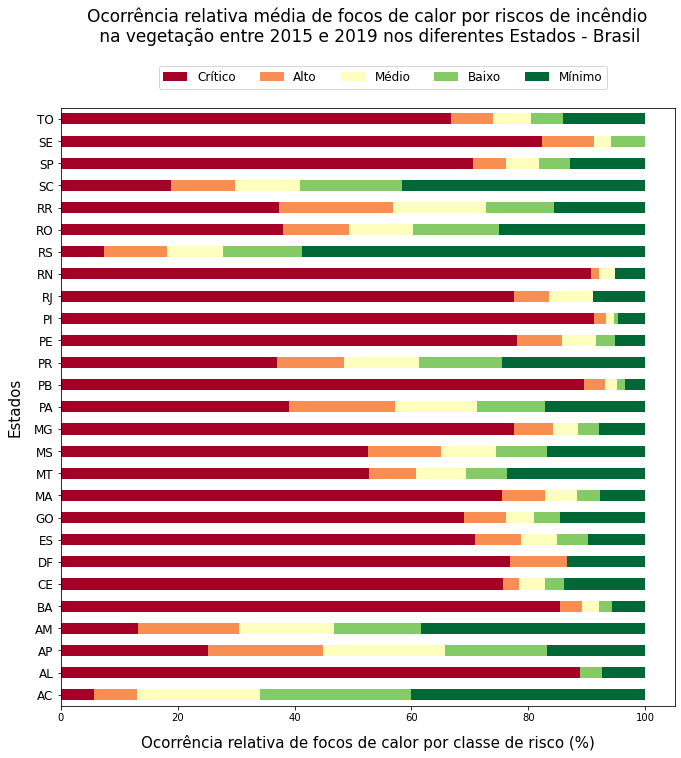

In [24]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
fig, ax = subplots()
stack_estado = average_estado.div(average_estado.sum(1), axis=0)
stack_estado.plot(kind='barh', stacked=True, colormap='RdYlGn', ax=ax, 
           figsize=(11, 11));
ax.legend(['Crítico','Alto','Médio','Baixo','Mínimo'],loc='best', 
          bbox_to_anchor=(0.5, .58, 0.4, 0.5), ncol=5, fontsize=12);
plt.yticks(np.arange(27),['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS',
                                         'MG','PA','PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC',
                                         'SP','SE','TO'],fontsize=12)
plt.xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1],[ "0", "20", "40", "60", "80", "100" ] )
ax.set_xlabel('Ocorrência relativa de focos de calor por classe de risco (%)',fontsize=15,labelpad=12)
ax.set_ylabel("Estados",fontsize=15,labelpad=12)
plt.title("Ocorrência relativa média de focos de calor por riscos de incêndio\n na vegetação entre 2015 e 2019 nos diferentes Estados - Brasil", fontsize=17, y=1.1);

In [25]:
Focos_brasil_2015_2019['Ano'] = Focos_brasil_2015_2019.datahora.dt.year

pvt_brasil_2015_2019 = pd.pivot_table(Focos_brasil_2015_2019, values=['riscofogo'],
                                      index=['Ano'],
                     columns=['risco_classe'], aggfunc=['count'],
                     fill_value=0, margins=True)

pvt_brasil_2015_2019 = pvt_brasil_2015_2019[[
    ('count', 'riscofogo', 'CRITICO'),
    ('count', 'riscofogo', 'ALTO'),
    ('count', 'riscofogo', 'MEDIO'),
    ('count', 'riscofogo', 'BAIXO'),
    ('count', 'riscofogo', 'MINIMO')]]


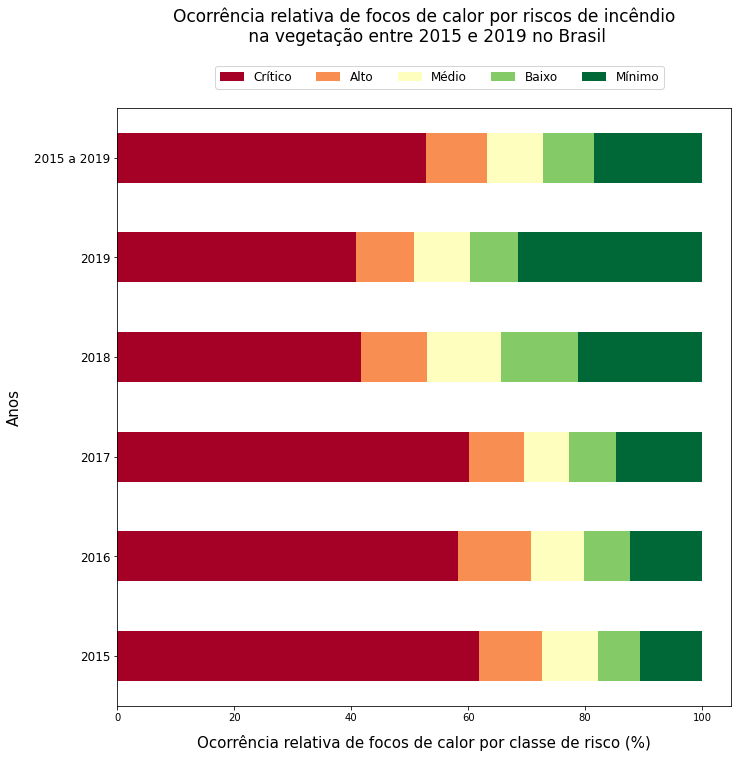

In [26]:
fig, ax = subplots()
stack_Brasil = pvt_brasil_2015_2019.div(pvt_brasil_2015_2019.sum(1), axis=0)
stack_Brasil.plot(kind='barh', stacked=True, colormap='RdYlGn', ax=ax, 
           figsize=(11, 11));
ax.legend(['Crítico','Alto','Médio','Baixo','Mínimo'],loc='best', 
          bbox_to_anchor=(0.5, .58, 0.4, 0.5), ncol=5, fontsize=12);
plt.yticks(np.arange(6),['2015', '2016', '2017', '2018','2019', '2015 a 2019'],fontsize=12)
plt.xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1],[ "0", "20", "40", "60", "80", "100" ] )
ax.set_xlabel('Ocorrência relativa de focos de calor por classe de risco (%)',fontsize=15,labelpad=12)
ax.set_ylabel("Anos",fontsize=15,labelpad=12)
plt.title("Ocorrência relativa de focos de calor por riscos de incêndio\n na vegetação entre 2015 e 2019 no Brasil", fontsize=17, y=1.1);
